<a href="https://colab.research.google.com/github/Arunsatvik/cmpe255-spring22/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   order_id  ...  item_price
0         1  ...      $2.39 
1         1  ...      $3.39 
2         1  ...      $3.39 
3         1  ...      $2.39 
4         2  ...     $16.98 
5         3  ...     $10.98 
6         3  ...      $1.69 
7         4  ...     $11.75 
8         4  ...      $9.25 
9         5  ...      $9.25 

[10 rows x 5 columns]


4622


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


4972




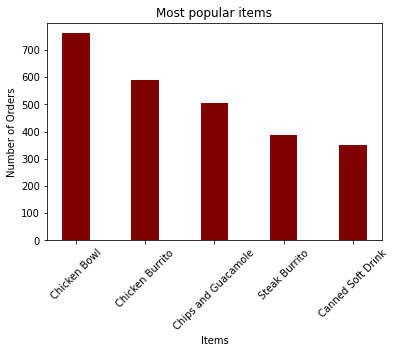

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70


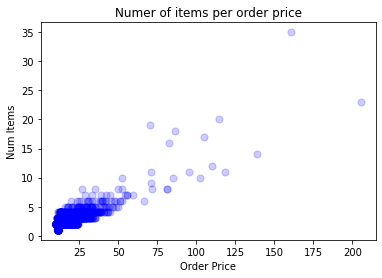

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class Solution:
    def __init__(self) -> None:
        self.chipo = pd.read_csv('/content/chipotle.tsv',sep='\t')

    
    def top_x(self, count) -> None:
        # Top x number of entries from the dataset and display as markdown format.
        top_x = self.chipo.head(count)
        print(top_x)
        print('\n')
        
    def count(self) -> int:
        # The number of observations/entries in the dataset.
        return self.chipo.shape[0]
    
    def info(self) -> None:
        print(self.chipo.info())
        print('\n')
    
    def num_column(self) -> int:
        # return the number of columns in the dataset
        return self.chipo.shape[1]
    
    def print_columns(self) -> None:
        # Print the name of all the columns.
        print(self.chipo.columns)
    
    def most_ordered_item(self):
        
        moi = self.chipo.groupby(['item_name'],as_index = False).agg({'quantity' : 'sum',
                     'order_id' : lambda x: x.iloc[-1]})
        moi = moi.sort_values(by=['quantity'], ascending = False)
        item_name = moi.iloc[0][0]
        order_id = moi.iloc[0][2]
        quantity = moi.iloc[0][1]
        return item_name, order_id, quantity


    
    def total_item_orders(self) -> int:
        total = self.chipo.quantity.sum()
        print(total)
        print('\n')
        return float(total)
    
    
    def total_sales(self) -> float:
        # TODO 
        # 1. Create a lambda function to change all item prices to float.
        # 2. Calculate total sales.
        self.chipo["item_price"] = self.chipo["item_price"].str[1:]
        self.chipo["item_price"] = self.chipo["item_price"].apply(lambda row: float(row))
        total = self.chipo["item_price"].sum()
        total = "{:.2f}".format(total)
        return float(total)
    
    def num_orders(self) -> int:
        # TODO
        # How many orders were made in the dataset?
        num = len(pd.unique(self.chipo['order_id']))
        return num
    
    
    def average_sales_amount_per_order(self) -> float:
        # TODO
        total = self.chipo["item_price"].sum()
        num = len(pd.unique(self.chipo['order_id']))
        avg = total/num
        avg = "{:.2f}".format(avg)
        return float(avg)
    
    
    def num_different_items_sold(self) -> int:
        # How many different items are sold?
        return self.chipo.item_name.nunique()
    
    def plot_histogram_top_x_popular_items(self, x:int) -> None:
        # 1. convert the dictionary to a DataFrame
        # 2. sort the values from the top to the least value and slice the first 5 items
        # 3. create a 'bar' plot from the DataFrame
        # 4. set the title and labels:
        #     x: Items
        #     y: Number of Orders
        #     title: Most popular items
        # 5. show the plot. Hint: plt.show(block=True).
        
        ht = self.chipo.groupby(["item_name"],as_index = False).sum(["quantity"])
        ht = ht.sort_values(by=['quantity'], ascending = False).head(5)
        x = ht['item_name']
        y = ht['quantity']
        plt.bar(x, y, color ='maroon',width = 0.4)

        plt.title("Most popular items")
        plt.xlabel("Items")
        plt.xticks(rotation=45)
        plt.ylabel("Number of Orders")
        plt.show()
        
    def scatter_plot_num_items_per_order_price(self) -> None:
        # 1. create a list of prices by removing dollar sign and trailing space.
        # 2. groupby the orders and sum it.
        # 3. create a scatter plot:
        #       x: orders' item price
        #       y: orders' quantity
        #       s: 50
        #       c: blue
        # 4. set the title and labels.
        #       title: Numer of items per order price
        #       x: Order Price
        #       y: Num Items
        
        temp = self.chipo.groupby("order_id").sum()
        print(temp.head(5))
        
        x = temp['item_price']
        y = temp['quantity']
        plt.scatter(x, y, s=50, c="blue", alpha=0.2)
        plt.title('Numer of items per order price')
        plt.xlabel('Order Price')
        plt.ylabel('Num Items')
        plt.show()



def test() -> None:
    solution = Solution()
    solution.top_x(10)
    count = solution.count()
    print(count)
    print('\n')
    assert count == 4622
    solution.info()
    count = solution.num_column()
    assert count == 5
    item_name, order_id, quantity = solution.most_ordered_item()
    assert item_name == 'Chicken Bowl'
    assert order_id == 1828
    assert quantity == 761
    total = solution.total_item_orders()
    assert total == 4972    
    assert 34500.16 == solution.total_sales()
    assert 1834 == solution.num_orders()
    assert 18.81 == solution.average_sales_amount_per_order()
    assert 50 == solution.num_different_items_sold()
    solution.plot_histogram_top_x_popular_items(5)
    solution.scatter_plot_num_items_per_order_price()

    
if __name__ == "__main__":
    # execute only if run as a script
    test()
    